In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pigura = plt.figure(figsize=(20,10))
ax1, ax2, ax3 = pigura.subplots(1,3)

#ax1
x = np.array([2,3,6])
y = np.array([1,3,5])
ax1.set(title='Title Axes 1', xlabel='Kilograms', ylabel='Province')
ax1.plot(x, y, 'r--')

#ax2
x = np.array([100,150,300,430,500])
y = np.array([50,10,-20,30,10])
ax2.set(title='Title Axes 2', xlabel='Speed', ylabel='Velocity')
ax2.plot(x, y, 'm^-', label='Bullet X')

#ax3
x = np.array([1,3,5,6,8])
y = np.array([0.3,0.5,0.3,0.7,1])
ax3.set(title='Title Axes 2', xlabel='Speed', ylabel='Velocity')
ax3.plot(x, y, 'go--', label='Bullet A')
ax3.plot(pow(x, 2), y ** 2, 'ro--', label='Bullet B')
ax3.legend(loc='upper right')

pigura2 = plt.figure(figsize=(20,20))
ax_row1, ax_row2 = pigura2.subplots(2,3)

#ax_row[0]
x_time = np.array([5,10, 15, 20, 25, 30])
y_oxygen = np.array([90, 80, 70, 50, 45, 39])
y_tankpressure = np.array([300, 250, 200, 100, 50, 25])
ax_row1[0].set(title='Title Axes Row 1 Column 1', xlabel='Hours', ylabel='Oxygen Level', xlim=[0,100], ylim=[0,100] )
ax_row1[0].plot(x_time, y_oxygen, 'b^--', label='Tank A')
ax_row1_2 = ax_row1[0].twinx()
#ax_row1_2.plot(x_time, y_tankpressure, 'ro-', label='Tank pressure')
ax_row1_2.bar(x_time, y_tankpressure)
ax_row1_2.set_ylabel('Tank pressure')
ax_row1[0].legend(loc='upper right')

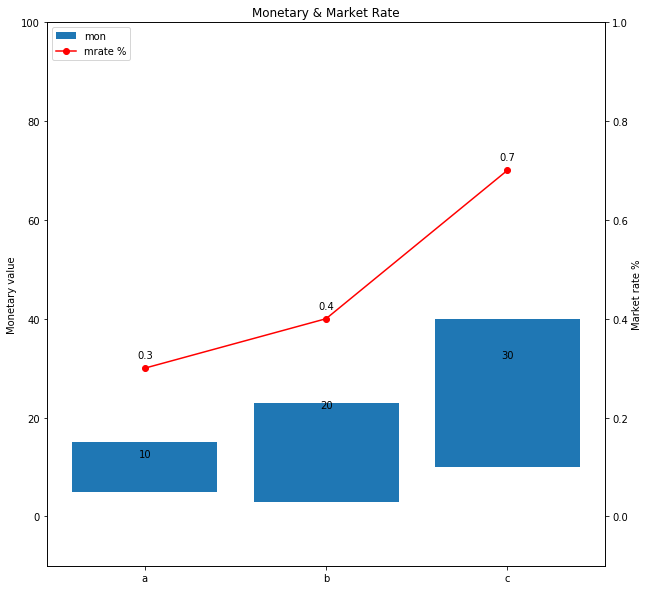

In [2]:
figure = plt.figure(figsize=(10,10))
ax = figure.subplots()
x = np.array(['a', 'b', 'c'])
ybar = np.array([10,20,30])
bottomax = np.array([5,3,10])
ax.set_ylim(-10,100)
ax.bar(x, ybar, bottom=bottomax, label='mon')
ax.set_ylabel('Monetary value')
ax.set(title='Monetary & Market Rate')
rspine = ax.twinx()
rspine.set_ylim(-.1,1)
rspine.set_ylabel('Market rate %')
mr = np.array([0.3,0.4,0.7])
rspine.plot(x, mr, 'ro-', label='mrate %')
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = rspine.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=2)
xrange = np.arange(0, len(x))
for xrange, ybar in zip(xrange, ybar):
    ax.annotate(ybar, (xrange,ybar), textcoords="offset points", xytext=(0,10), ha="center")
    rspine.annotate(mr[xrange], (xrange,mr[xrange]), textcoords="offset points", xytext=(0,10), ha="center" )


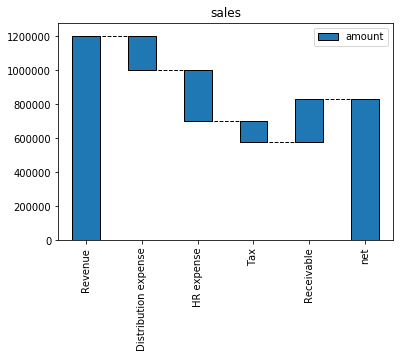

In [4]:
index = ['Revenue', 'Distribution expense', 'HR expense', 'Tax', 'Receivable']
mydata = {'amount':[1200000, -200000, -300000, -1200000*0.1, 250000]}
df = pd.DataFrame(data=mydata, index=index)
dfcumsum = df.amount.cumsum()
# print(df, '\n', dfcumsum)
dfamounttotal = df.sum().amount
blank = dfcumsum.shift(1).fillna(0)
blank.loc['net'] = dfamounttotal
df.loc['net'] = dfamounttotal
# print(blank)
# print(dfamounttotal, '\n', blank, '\n', df)
step = blank.reset_index(drop=True).repeat(3).shift(-1)
step[1::3]= np.nan
blank.loc['net'] = 0
myplot = df.plot(kind='bar', stacked=False, bottom=blank, title='sales', edgecolor='k', linewidth=1)
max = df.max()
plot_offset = int(max / 15)
myplot.set_ylim(0,blank.max()+int(plot_offset))
myplot.plot(step.index, step.values, 'k--', linewidth=1)


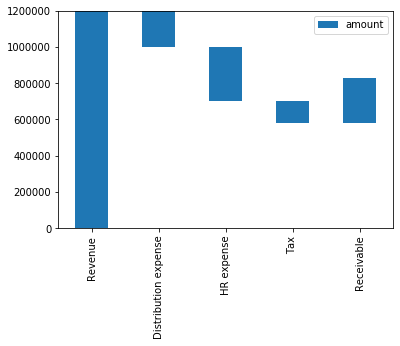

In [345]:
index = ['Revenue', 'Distribution expense', 'HR expense', 'Tax', 'Receivable']
mydata = {'amount':[1200000, -200000, -300000, -1200000*0.1, 250000]}
df2 = pd.DataFrame(data=mydata, index=index)
df2.plot(kind='bar', bottom=blank)